In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics, linear_model


In [2]:
df = pd.read_csv("../data/Admission_Predict.csv").drop(columns=["Serial No."])
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [3]:
np.random.seed(192)

In [4]:

train = df[0:350]
test = df[350:df.shape[0]]


In [5]:
X_train = train.drop(columns=["Chance of Admit"])
Y_train = (train["Chance of Admit"].values >= 0.75).astype(int)
# Y_train = (Y_train_probs < 0.75).astype(int)

X_test = test.drop(columns=["Chance of Admit"])
Y_test = (test["Chance of Admit"].values >= 0.75).astype(int)



## Create Xbar

In [6]:
ones = np.ones((train.shape[0]))
Xbar = np.row_stack((ones, X_train.T))
Xbar = Xbar.T

ones = np.ones((test.shape[0]))
Xbar_test = np.row_stack((ones, X_test.T))
Xbar_test = Xbar_test.T

Xbar

array([[  1.  , 337.  , 118.  , ...,   4.5 ,   9.65,   1.  ],
       [  1.  , 324.  , 107.  , ...,   4.5 ,   8.87,   1.  ],
       [  1.  , 316.  , 104.  , ...,   3.5 ,   8.  ,   1.  ],
       ...,
       [  1.  , 299.  ,  94.  , ...,   1.  ,   7.34,   0.  ],
       [  1.  , 302.  ,  99.  , ...,   2.  ,   7.25,   0.  ],
       [  1.  , 313.  , 101.  , ...,   3.  ,   8.04,   0.  ]])

In [7]:
def sigmoid(s):
    return 1/(1+np.exp(-s))

def logistic_function(X, Y, w_init, eta, tol=1e-4, max_count=10000):
    w = [w_init]
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20

    while (count < max_count):
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = Y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))

            w_new = w[-1] + eta * (yi - zi)*xi
            count += 1

            if (count % check_w_after == 0):
                if (np.linalg.norm(w_new - w[-check_w_after]) < tol):
                    return w
                
            w.append(w_new)

    return np.array(w)

In [8]:
eta = 0.05

d = Xbar.shape[1]
w_init = np.random.randn(d, 1)

w = logistic_function(Xbar.T, Y_train.T, w_init, eta)
w[-1].T

C:\Users\Admin\AppData\Local\Temp\ipykernel_14060\826081868.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-s))


array([[ -6.39283586, -73.62505158, 200.532459  , 140.64502807,
        107.84807284,  90.87220061,  43.19138007,  54.46377548]])

In [9]:
y_pred = sigmoid(w[-1].T @ Xbar_test.T)
y_pred = (y_pred >= 0.75).astype(int)
y_pred = y_pred.flatten()
y_pred


C:\Users\Admin\AppData\Local\Temp\ipykernel_14060\826081868.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-s))


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1])

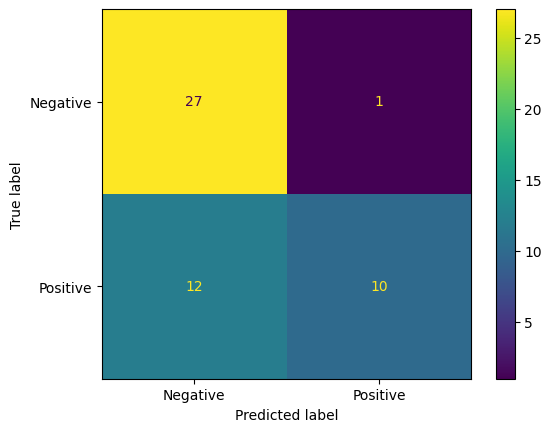

In [10]:
confusion_matrix = metrics.confusion_matrix(Y_test, y_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=["Negative", "Positive"]).plot()


In [11]:
acc = metrics.accuracy_score(Y_test, y_pred)
precision = metrics.precision_score(Y_test, y_pred)
recall = metrics.recall_score(Y_test, y_pred)

print(f"Accuracy: {acc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.74
Precision: 0.9090909090909091
Recall: 0.45454545454545453


## Library

In [12]:
logistic_regressor = linear_model.LogisticRegression(penalty="none")
logistic_regressor.fit(X_train, Y_train)


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty='none')

In [13]:
logistic_regressor.predict(X_test)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1])